In [61]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import numpy as np


In [62]:
import re

def parse(txt):
    matches = re.search(r"(\d+),(\d+) -> (\d+),(\d+)", txt)
    x1 = int(matches.group(1))
    y1 = int(matches.group(2))
    x2 = int(matches.group(3))
    y2 = int(matches.group(4))
    return x1, y1, x2, y2

def cells(xMax, yMax):
    for y in range(0, yMax+1):
        for x in range(0,xMax+1):
            yield (x, y)

def is_v_line(line):
    x1, _, x2, _ = line
    return x1 == x2

def is_h_line(line):
    _, y1, _, y2 = line
    return y1 == y2

def intersect(line, cell):
    x1, y1, x2, y2 = line
    px, py = cell
    if is_v_line(line):
        return (x1 <= px <= x2) or (x2 <= px <= x1)
    elif is_h_line(line):
        return (y1 <= py <= y2) or (y2 <= py <= y1)
    else:
        return False
    
input = None
filename = "day5-sample.txt" 
with open(filename) as reader:
    input = reader.readlines()

xMax = 0
yMax = 0
lines = []
for txt in input:
    line = parse(txt)
    lines.append(line)
    
    if line[0] > xMax:
        xMax = line[0]
    if line[2] > xMax:
        xMax = line[2]
    if line[1] > yMax:
        yMax = line[1]
    if line[3] > yMax:
        yMax = line[3]

20


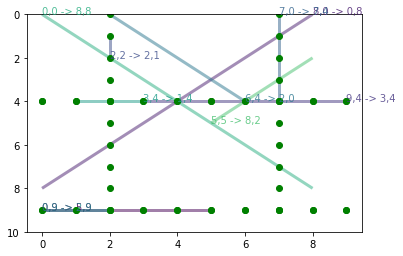

In [82]:
fig, ax = plt.subplots()
virids_colors=plt.cm.get_cmap(plt.cm.viridis).colors
my_colors = list(map(lambda c: (c[0], c[1], c[2], 0.5), virids_colors))[::20]

lc = mc.LineCollection(map(lambda line: [(line[0], line[1]), (line[2], line[3])], lines), colors=my_colors, linewidths=3)
ax.add_collection(lc)
ax.autoscale()
ax.set_ylim(10, 0)
for i in range(0,len(lines)):
    l = lines[i]  
    ax.text(l[0], l[1], f"{l[0]},{l[1]} -> {l[2]},{l[3]}", color=[*my_colors[i][:3], 0.8])

def plot_point(cell):
    ax.plot(cell[0], cell[1], 'go')

totalOverlaps = 0
for cell in cells(xMax, yMax):
    cellOverlaps = 0
    for line in lines:
        if intersect(line, cell):
            cellOverlaps += 1
            # print(cell, line, cellOverlaps, totalOverlaps)
            plot_point(cell)
    if cellOverlaps >= 2:
        totalOverlaps += 1
        

print(totalOverlaps)